# Thomas Fire Analysis: AQI and False Color Image
By Caitlin Nordheim-Maestas

You can find more information on my GitHub Repository: [https://github.com/cnordheim-maestas/thomas-fire-analyses.git](https://github.com/cnordheim-maestas/thomas-fire-analyses.git)

## About

Wildfires can have dramatic impacts on both human health and the environment. Here, we will investigate some of the impacts of the Thomas Fire in Santa Barbara County, a fire that occurred in December 2017 and continued through mid January 2018. One impact of wildfires especially important to human health is the change in air quality. Air quality can be tracked through an Air Quality Index (AQI), which ranges from 0-500, with a higher value being worse air quality. For reference, an AQI below 50 is ideal, and above 100 is unhealthy for sensitive groups, and above 150 is unhealthy for non-sensitive groups. Wildfires can also have drastic impacts on vegetation and soil, especially their moisture levels. False color images are a very useful tool to visualize trends not obvious to the human eye, such as near infrared and shortwave infrared data. Here, we will make a False Color Image to view spatial trends around the Thomas Fire boundary. 

### Purpose

We are looking into two important outcomes of the Thomas fire (1) how the fire impacted the air quality in Santa Barbara County, and (2) how the fire impacted the land in the area of the fire compared to the rest of the county. Specifically, we are looking into the Air Quality Index (AQI) across 2017 and 2018, calculating the rolling five-day average AQI, and visualizing how the AQI changed in relation to the fire by paying special attention to December 2017 and January 2018. We will look into the change in vegetation in the area impacted by the fire by creating a False Color Image of the surrounding spatial area to compare the short-wave infrared (swir22) and near-infrared values inside and outside of the fire boundary. The short-wave infrared values give an insight into the vegetation and soil moisture levels. We will plot the fire's geographical boundary to make this comparison simple. 

## Highlights of analyses

- Import and clean timeseries data using `pandas`
- Calculate a rolling average over a 5 day rolling window
- Visualize the average AQI and AQI readings over time, specifying colors using a dictionary
- Import and clean raster and shapefile data using `rasterio` and `geopandas`
- Change Coordinate Reference System (crs) to ensure the raster and shapefile match
- Create a False Color Image by overlaying three variables of interest and the fire boundary shapefile
- Customizing a plot using `matplotlib`'s `pyplot` and `mpatches` to create an aesthetically pleasing legend


## Dataset descriptions

1. AQI Data:

We will use the Air Quality Index (AQI) data collected from the United States Environmental Protection Agency Air Data from 2017 and 2018. The AQI is calculated across the United States of America, and daily AQI summaries were calculated per County by the EPA. We will combine the 2017 and 2018 datasets, and select only the observations from Santa Barbara County in California for our analyses.

2. Landsat Collection 2:

To create the false color image to elucidate any spatial patterns with the Thomas fire's location, we will utilize the Landsat Collection 2 Level-2 data on atmospherically surface reflectance data. The data wass created and curated by United States Geological Survey in collaboration with the National Aeronautics and Space Administration's Landsat Missions, collected by the Landsat 8 satellite and hosted by Microsoft Planetary Computer. We will be using data that was pre-processed in the Microsoft Planetary Computer by Dr. Carmen Galaz-Garcia to only include the land near the Thomas Fire and coarsen the data. The bands we will be using are: red, near-infrared (nir) and shortwave infrared (swir). 

3. California Fire Perimeters:

The Thomas fire perimeter is from the California Department of Forestry and Fire Protection. This is a shapefile with outlines of fire perimeters in California from 2017. We will overlay our False Color Image created with the LandSat data with the perimeter of the Thomas fire. 

### Data citations

United States Environmental Protection Agency Air Data (2023), daily_aqi_by_cbsa_2017.zip [Data file] Available from: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI. Access date: 11.27.2023.

United States Geological Survey & National Aeronautics and Space Administration (2023), Landsat Collection 2 Level-2 [Data file] Available from: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2. Access date: 11.27.2023.

California Department of Forestry and Fire Protection (2023), California Fire Perimeters (all) [Data file] Available from: https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about. Access date: 11.27.2023.

## Contents
1. AQI Timeseries Analysis
- 1A: AQI Data Preparation: AQI Data Access, Cleaning, Exploration
- 1B: AQI Data Analysis
 
2. False Color Image Spatial Analysis
 - 2A: LandSat & Fire Boundaries Data Preparation: Data Access and Cleaning
 - 2B: LandSat & Fire Boundaries Data Exploration

3. Final Outputs
- 3A: AQI Visualization
- 3B: False Color Image Visualization

## 1. AQI Timeseries Analysis

### 1A: AQI Data Preparation: AQI Data Access, Cleaning, Exploration

Here, we will load in the library needed for the AQI analysis and plotting, `pandas`. We will import the AQI data from two separate links using the `read.csv` function. 

Next, we will clean the AQI datasets by combining the two datasets using the pandas `concat` function to concatenate the 2017 and 2018 data together, and check that it worked by printing the length of the concatenated dataset. We'll clean the combined dataset by making the column names in "snake_case", lowercase and separated by underscores. Next, we need to subset only the data from Santa Barbara county, using the `loc` to subset, and drop unneeded column names, since we no longer have multiple states or counties. 

Now we are ready to prep the data for proper timeseries work! The date column was initially in a string, but we convert it to a datetime using the `to_datetime` function. Then, we update the index of the dataframe to be the date column in the datetime format, since that is most conducive to the upcoming timeseries calculations.

We will explore our nicely cleaned AQI dataset by using the `.info()` function to see the datatypes, number of entries, and timeframe in the datetime index. We will also use the `.min()` and `.max()` functions in combination with a print statement to print the range of the data, and do an exploratory plot. This exploratory plot looks great using only the ".plot()" code because we previously set the index as the date in the proper datetime format. 

Concatenate worked?: True
Subset worked?: [ True]
Datetime worked?: True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   aqi                        730 non-null    int64 
 1   category                   730 non-null    object
 2   defining_parameter         730 non-null    object
 3   defining_site              730 non-null    object
 4   number_of_sites_reporting  730 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 34.2+ KB
None
the range of aqi values is:  20 - 281


<AxesSubplot:title={'center':'Exploratory plot of SB AQI dataset'}, xlabel='date'>

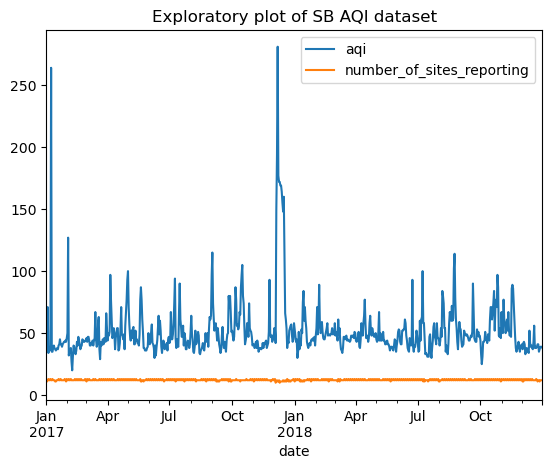

In [35]:
# Import libraries and functions
import pandas as pd # data manipulation & analysis

# import AQI 2017 data
# using the pandas read_csv function
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')

# import AQI 2018 data
# using the pandas read_csv function
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# --------------------------------
# Data cleaning 

# AQI data cleaning
# glue the 2017 and 2018 files together using concatenate
aqi = pd.concat([aqi_17, aqi_18])
# is the sum of the length of both data files the same as the length of the of cancatenated file?
print('Concatenate worked?:',  (len(aqi_17) + len(aqi_18)) == len(aqi))

# clean column names: make all lower case and replace spaces with underscores
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')
# print('updated column names (checking for snake_case): ', aqi.columns.values, '\n') # uncomment to confirm updated column names

## Geographical context: Santa Barbara only
# subset Santa Barbara: select rows where the county_name is santa barbara only
aqi_sb=aqi.loc[aqi.county_name=="Santa Barbara"]
# check it worked: is the only county Santa Barbara?
print('Subset worked?:', 'Santa Barbara' == aqi_sb.county_name.unique())

## More data cleaning
# drop unecessary columns from subset: drop 'state_name', 'county_name', 'state_code' and 'county_code' columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code','county_code'])
# print('updated column names in sb subset: ', aqi_sb.columns.values, '\n') # uncomment to confirm updated column names

# convert date column from string to timestamps
aqi_sb.date = pd.to_datetime(aqi_sb.date)
# expecting a datetime, check:
print('Datetime worked?:', 'datetime64[ns]' == aqi_sb.date.dtypes)

# set date coumn as index
aqi_sb = aqi_sb.set_index('date')
# can check this in the data exploration output

# --------------------------------
# Data Exploration

# AQI data
# Let's explore the cleaned aqi data, that just has Santa Barbara, and includes 2017 and 2018

# use the .info() function to see the datatypes, number of entries, and timeframe in the datetime index
print(aqi_sb.info())

# let's look at the range of the aqi values
print('the range of aqi values is: ', aqi_sb.aqi.min(), '-', aqi_sb.aqi.max())

# exploratory plot
aqi_sb.plot(title="Exploratory plot of SB AQI dataset") 

### 1B: AQI Data Analysis

Now we can dive into analysis! Remember, one of our goals was to determine if and how the AQI changes through time 2017-2018. We will look at both the raw AQI data, and calculate a five-day rolling average of the AQI, to reveal longer-term trends. So, we need a new column in our dataset with the five day rolling average. The rolling average is calculated by the `.rolling()` function following the column we want to calculate, aqi, where we specify five days by inputting "5D" in the parentheses, followed by what we want to calculate, which is the average, so we add on the `.mean()` function. To put this in a new column, we use the syntax `df['new column name']` on the left hand side. Again, this works so seamlessly because we have our dataset set up with the datetime as the index!

Once the rolling average is calculated, we will check that it worked by printing the column names to check the new one is there, and print the range of the new column as we did above. 

In [36]:
# Analysis: calculate the 5-day rolling average and add it as a column

# add column with 5 day average AQI and calculate the 5 day rolling average using the "rolling" function
# '5D' corresponds to 5 day
# .mean() because we want the average
# adding a column using the syntax on the left

aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# let's check that it worked! 
# print('updated column names (checking the five_day_average showed up): ', aqi_sb.columns.values, '\n') # uncomment to confirm updated column names

# let's check the range of average values
print('The range of aqi 5-day average values is: ', aqi_sb.five_day_average.min(), '-', aqi_sb.five_day_average.max(), '\n')

The range of aqi 5-day average values is:  30.4 - 199.2 



## 2: False Color Map Spatial Analysis

### 2A: LandSat and Fire Perimeter Data Access & Cleaning

For the spatial part of our analysis, we will need far more libraries and functions loaded, see the comments in the code for a brief description of their purpose here. We will load in our data using the `os` library, because it helps file paths work more universally. Loading in data using os requires a file pathname, which we will call "fire_fp" for the fire boundary filepath, and "land_fp" for land filepath, directing us to our data in the data folder. We will import the fire boundary data shapefile data, also using the `os`pathname. Because it is a shapefile, we will open the data using the `geopandas`library function `gpd.read_file` and input our filepath. We can open our landsat raster data using `rasterio`.

Next, it is time to clean our raster files and shapefiles. The raster file requires reduction, it just has one band, which isn't necessary, so we will use the `.squeeze()` function to remove the band, and the `.drop('band')` to remove the coordinates associated with the band, to end up with a reduced raster with out the band, which we will check by printing the `dims` (number of dimmensions) and `coords` (coordinates). The fire boundaries shapefile will need to be in the same coordinate reference system as the raster, which we can reproject using the `to_crs()` function. Here, we will direct to the desired crs by pulling the crs from the raster file. This needs to be done using the `.rio` accessor before specifying that we want the `.crs` from the land raster. We will save the reprojected fire boundaries shapefile as a new file to aid in the data exploration further below. To finish the crs, we will check that the reprojected shapefile and raster crs' match.Next we will subset to the proper geographical context, the boundary of the Thomas Fire. This will be done by specifying that we only want data where the values in the "FIRE_NAME" column are "THOMAS".

In [88]:
# Import libraries and functions
import os # accessible file paths
import pandas as pd # data manipulation & analysis
import geopandas as gpd # geospatial data manipulation
import rioxarray as rioxr # for geospatial n-dimmensional array data
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for pretty legends

# ---------------------------
# Data Access

# Import fire perimeters in California during 2017 using geopandas
# use the os to get the current working directory
fire_fp = os.path.join(os.getcwd(),'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp')
fire = gpd.read_file(fire_fp) # use gpd to read the file because it's a shapefile

# import landsat data using rasterio 
# use the os to get the current working directory
land_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
land = rioxr.open_rasterio(land_fp) # use this for geospatial raster data
# land # uncomment to explore the raster

# ---------------------------
# Data cleaning

# Landsat data cleaning
# Raster reduction: drop the uneeded band in land data
print(f"Before squeeze: dimensions {land.dims}") # note the extra band
# remove length 1 dimension (band) using squeeze and remove coordinates associated to band
land = land.squeeze().drop('band')
print(f"After squeeze: dimensions {land.dims}") # note the extra band is gone!

# Fire perimeters data cleaning: Geographical context: Only the Thomas Fire
# make sure CRS' match
fire_reprojected = fire.to_crs(land.rio.crs) # change to the land crs, note the rio accessor for the raster file
print('matched crs?',  fire_reprojected.crs == land.rio.crs) # ensure they match

# subset only thomas fire
thomas_fire = fire_reprojected[(fire_reprojected.FIRE_NAME=='THOMAS')]
# check it worked: is the only fire Thomas?
print('Fire subset worked?:', 'THOMAS' == thomas_fire.FIRE_NAME.unique(), '\n')

Before squeeze: dimensions Frozen({'y': 731, 'x': 870, 'band': 1})
After squeeze: dimensions Frozen({'y': 731, 'x': 870})
matched crs? True
Fire subset worked?: [ True] 



### 2B: LandSat & Fire Boundaries Data Exploration

We will explore our cleaned raster file and shapefile next. We will do this by printing relevant information to the files rather than opening up the files. Note that we will use the `.rio` accessor to get the raster information. 

In our LandSat raster fie, we will look at the:
- Coordinate reference system
- Height and width
- Spatial bounding box

In our Thomas Fire shapefile, we will explore:
- Coordinate reference system before and after the reprojection
- Number of fires in the original fire boundary dataset vs the number of fires in the Thomas fire subset
- Exploratory plot of the original fire boundaries dataset and the Thomas fire subset (using `matplotlib`'s `pyplot` and `mpatches`)

Landsat data CRS:  EPSG:32611
Landsat data height: 731  & width: 870
Landsat data spatial bounding box: 
(121170.0, 3755160.0, 356070.0, 3952530.0) 

Fire perimeter data original crs:  epsg:3857
Updated Fire perimeter matches LandSat crs? True 

Fire perimeter data original number of fire names included:  520
Updated Fire perimeter data number of fire names included:  1 



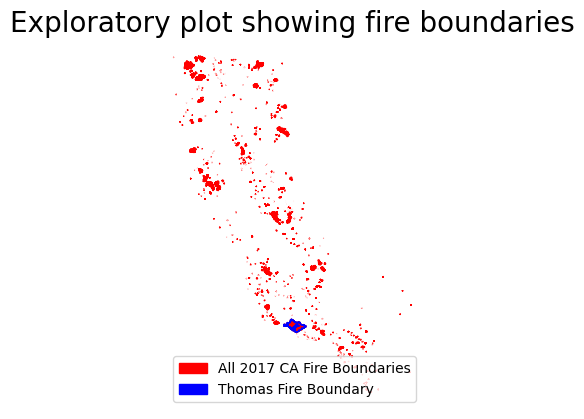

In [87]:
# Landsat data exploration
# check crs, height, width, bounding box
print('Landsat data CRS: ', land.rio.crs)
print('Landsat data height:', land.rio.height, ' & width:', land.rio.width)

print('Landsat data spatial bounding box: ')
print(land.rio.bounds(), '\n')

# Fire perimeters data exploration
# check original crs and updated crs:
print('Fire perimeter data original crs: ',  fire.crs) 
print('Updated Fire perimeter matches LandSat crs?',  land.rio.crs == thomas_fire.crs, '\n') # ensure they match

# let's get some info on how many fires there were before clipping
print('Fire perimeter data original number of fire names included: ',  fire.FIRE_NAME.nunique())
print('Updated Fire perimeter data number of fire names included: ',  thomas_fire.FIRE_NAME.nunique(), '\n')

# exploratory plot:
# exploratory plot of fire boundaries
fig, ax= plt.subplots() # sets up the axis for the plots
ax.axis('off') # remove the pesky axis box

#----------------------------------
# all 2017 fires boundaries
fire_reprojected.plot(ax=ax, edgecolor='red', facecolor="red") # blue edge color and no fill
# make legend pretty
bbox_patch = mpatches.Patch(color='red', label = 'All 2017 CA Fire Boundaries') # make a patch for the legend that is blue and labeled

#----------------------------------
# thomas fire boundary
thomas_fire.plot(ax=ax, edgecolor='blue', facecolor="none") # blue edge color and no fill
# make legend pretty
bbox2_patch = mpatches.Patch(color='blue', label = 'Thomas Fire Boundary') # make a patch for the legend that is blue and labeled

# create a legend
ax.legend(handles = [bbox_patch, bbox2_patch], loc='lower right') # add in my match from earlier and put the legend cemented to the upper right

# add a title
ax.set_title('Exploratory plot showing fire boundaries', fontsize=20) # make the fontside bigger

plt.show() # show the plot

## 3: Final outputs

### 3A: AQI Data Visualization

Next, it is time to make a timeseries plot of AQI values across time! We will specify our custom colors for the plot using a dictionary and assigning the hex code of the colors we want to each variable. To complete the plot, we will specify our arguments in the `.plot()` function, and specify that we want both the aqi and the rolling average, and add a plot title, x and y labels, and call in the color dictionary to specify our colors. 

<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

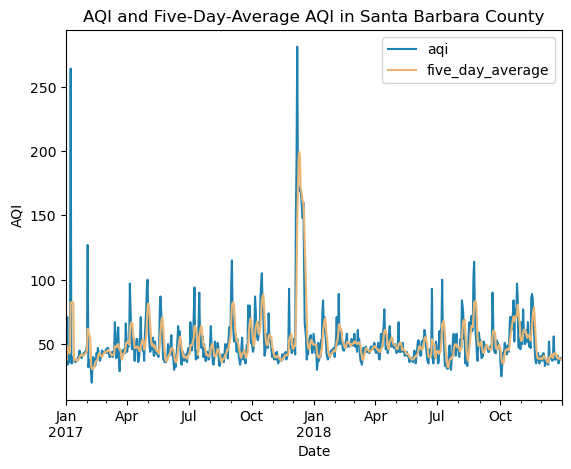

In [37]:
# AQI through time
# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )

### 3B: False Color Image Visualization

We are plotting the short wave infrared band, the near infrared band, and the red band for this false color image. The USGS has a very useful resource for which bands may be best for your research, found here: https://www.usgs.gov/faqs/what-are-best-landsat-spectral-bands-use-my-research. 

The bands we are using and and justifications are:
- swir22: to visualize soiland vegetation moisture
- nir08: to put emphasis on biomass content
- red: to visualize vegetation slopes

We will build our false color image using a relatively long line of code, so let's break this down:

`land[['swir22','nir08','red']].to_array().plot.imshow(robust=True)`

Where:
- `land` is our raster file
- `[['swir22','nir08','red']].to_array()` selects our three variables of interest and makes them an array using the `to_array()`
- `.plot.imshow()` creates the image we plan to plot
- `(robust=True)` is used to cut the extreme data from the analyses and only plot the 2nd - 98th percentile. This ensures the extreme data can't distort our plot

Next, we can add in the Thomas fire boundary shapefile. Note this works because we have it in the case coordinate reference system!

We will also customize our plot, and plot using `matplotlib`'s `pyplot` and `mpatches` to make this fancy plot and legend. See the annotated code for details on each function and argument: 

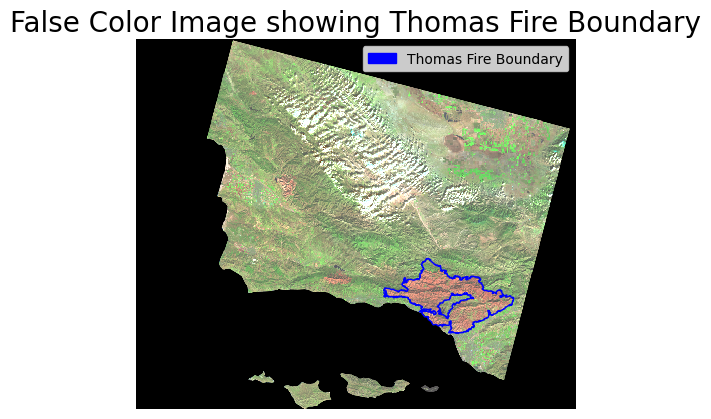

In [69]:
# False color image:
fig, ax= plt.subplots() # sets up the axis for the plots
ax.axis('off') # remove the pesky axis box

#----------------------------------
# False color image
land[['swir22','nir08','red']].to_array().plot.imshow(robust=True, ax=ax) # see markdown above for explanation of this code
#----------------------------------
# thomas fire boundary
thomas_fire.plot(ax=ax, edgecolor='blue', facecolor="none") # blue edge color and no fill
# make legend pretty
bbox_patch = mpatches.Patch(color='blue', label = 'Thomas Fire Boundary') # make a patch for the legend that is blue and labeled

#----------------------------------
# create a legend
ax.legend(handles = [bbox_patch], loc='upper right') # add in my match from earlier and put the legend cemented to the upper right

# add a title
ax.set_title('False Color Image showing Thomas Fire Boundary', fontsize=20) # make the fontside bigger

plt.show() # show the plot